https://medium.com/hackernoon/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23

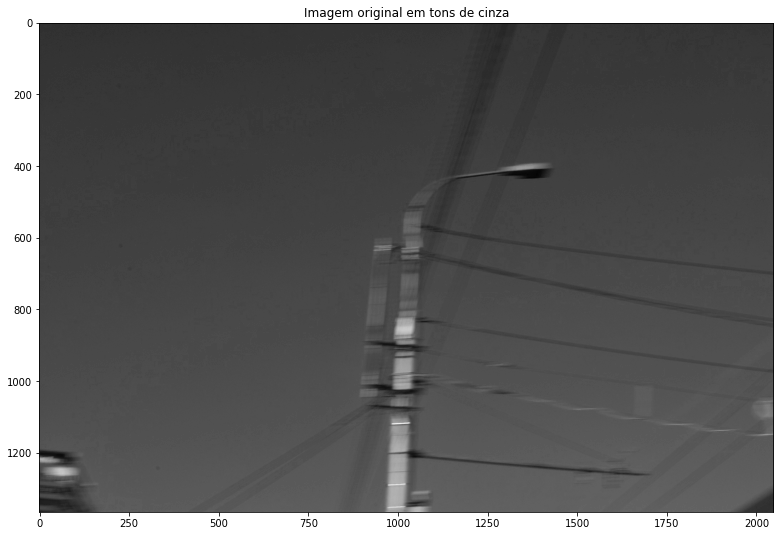

In [221]:
from matplotlib.pyplot import *
from matplotlib.image import *
from numpy import *
from scipy import *

def rgb2gray(rgb):
    return dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

im = imread("tarefa8_borrada.jpg")[:,:,0]

figure(figsize=(16,9))
imshow(im, cmap=get_cmap('gray'));title('Imagem original em tons de cinza');show()

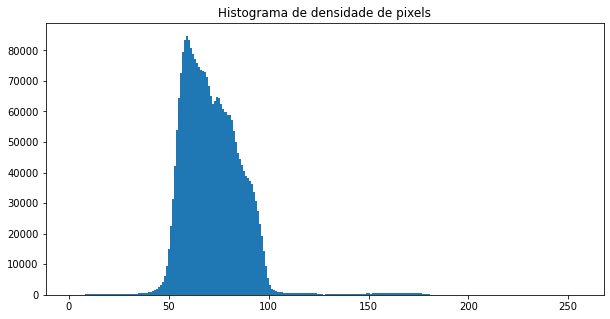

In [222]:
im_shape = shape(im)
im_hist = im.flatten()

figure(figsize=(10,5))
hist(im_hist, bins=256);title('Histograma de densidade de pixels');show()

$P_x(j) = \sum^{j}_{i=0}P_x (i)$

In [223]:
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
histograma = get_histogram(im_hist, 256)

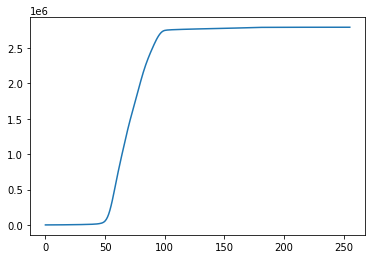

In [224]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(histograma)

# display the result
plot(cs)

$s_k = \sum^{k}_{j=0} \frac{n_j}{N}$

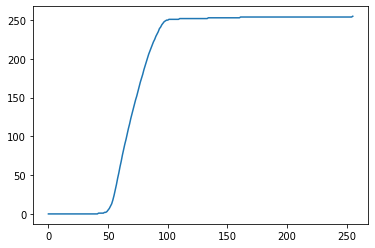

In [225]:
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plot(cs)

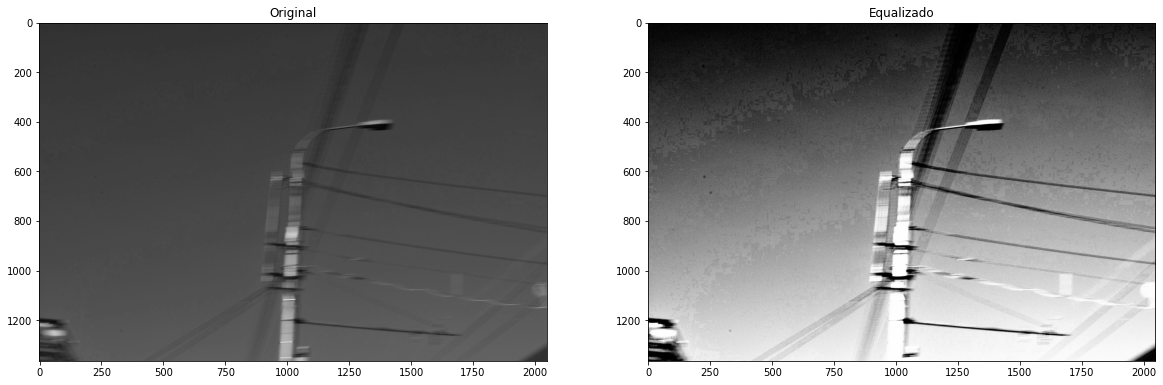

In [226]:
img_new = cs[im_hist.astype(int)]

# put array back into original shape since we flattened it
img_new = reshape(img_new, im.shape)

# set up side-by-side image display
fig = figure()
fig.set_figheight(15)
fig.set_figwidth(20)

fig.add_subplot(1,2,1)
imshow(im, cmap='gray')
title("Original")

# display the new image
fig.add_subplot(1,2,2)
imshow(img_new, cmap='gray')
title('Equalizado')
show(block=True)

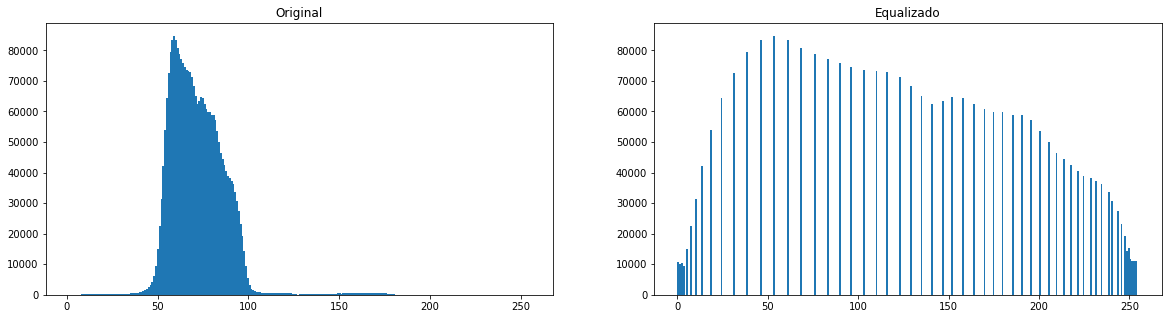

In [229]:
fig = figure()
fig.set_figheight(5)
fig.set_figwidth(20)

fig.add_subplot(1,2,1)
hist(im.flatten(),bins=256)
title("Original")

fig.add_subplot(1,2,2)
hist(img_new.flatten().astype(int),bins=256)
title("Equalizado")
show(block=True)

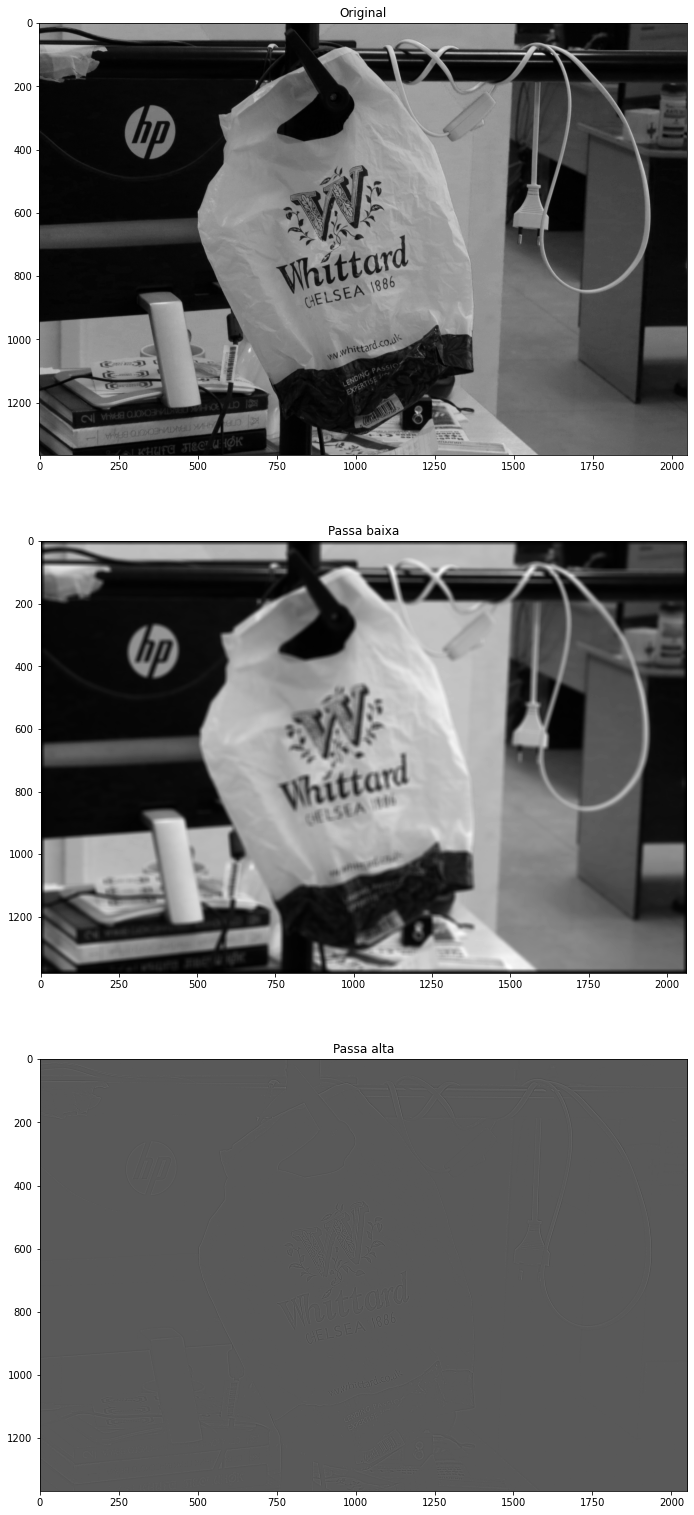

In [356]:
img = imread('tarefa8.JPG')[:,:,0]

filt_lp = ones((15,15)) *(1/15**2)
img_lp = convolve2d(img, filt_lp)

filt_hp = array([[-1, -1, -1],
                 [-1,  8, -1],
                 [-1, -1, -1]])
img_hp = convolve2d(img, filt_hp)


fig = figure(figsize=(25,27))

fig.add_subplot(3,1,1)
imshow(img, cmap='gray')
title("Original")

fig.add_subplot(3,1,2)
imshow(img_lp, cmap='gray')
title("Passa baixa")

fig.add_subplot(3,1,3)
imshow(img_hp, cmap='gray')
title("Passa alta")
show()

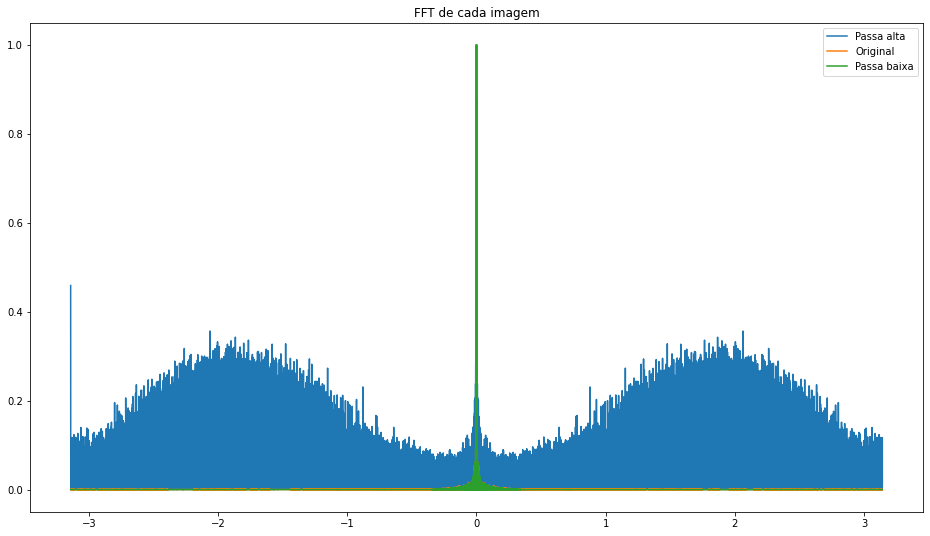

In [357]:
from scipy.fft import *


fft_img = fftshift(abs(fft(img.flatten())))

fft_img_lp = fftshift(abs(fft(img_lp.flatten())))

fft_img_hp = fftshift(abs(fft(img_hp.flatten())))

figure(figsize=(16,9))

plot(fftshift(fftfreq(len(fft_img_hp))*2*pi), fft_img_hp/fft_img_hp.max(), label='Passa alta' )

plot(fftshift(fftfreq(len(fft_img))*2*pi), fft_img/fft_img.max(), label='Original' )

plot(fftshift(fftfreq(len(fft_img_lp))*2*pi), fft_img_lp/fft_img_lp.max(), label='Passa baixa' )



title("FFT de cada imagem");legend();show()

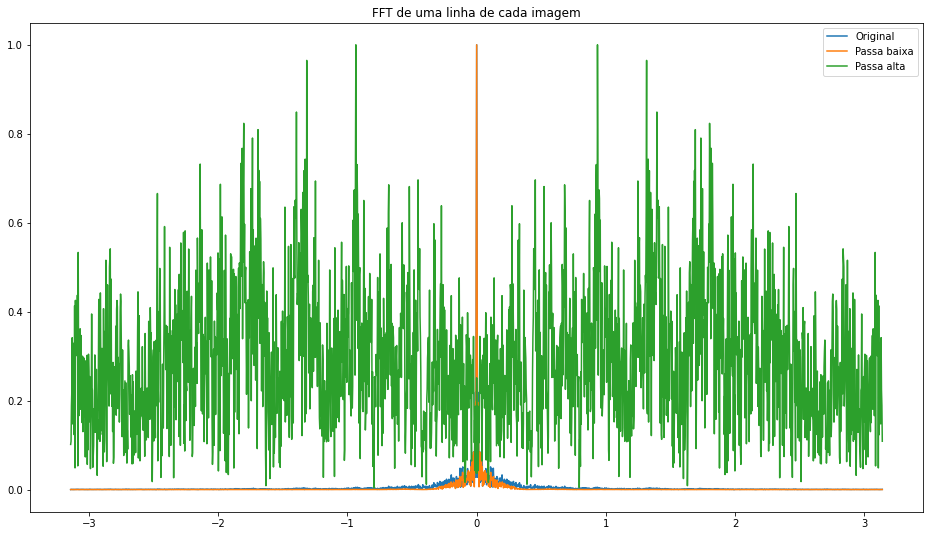

In [349]:
n = 500

fft_im = fftshift(abs(fft(img[n])))

fft_im_lp = fftshift(abs(fft(img_lp[n])))

fft_im_hp = fftshift(abs(fft(img_hp[n])))

figure(figsize=(16,9))

plot(fftshift(fftfreq(len(fft_im))*2*pi), fft_im/fft_im.max(), label='Original' )

plot(fftshift(fftfreq(len(fft_im_lp))*2*pi), fft_im_lp/fft_im_lp.max(), label='Passa baixa' )

plot(fftshift(fftfreq(len(fft_im_hp))*2*pi), fft_im_hp/fft_im_hp.max(), label='Passa alta' )

title("FFT de uma linha de cada imagem");legend();show()